## equity price in sector

In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

# pip install numpy
# conda install -c anaconda pandas
# conda install -c conda-forge matplotlib

import datetime as dt # For defining dates

import time

# In Powershell Prompt : conda install -c conda-forge multitasking
# pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

import yfinance as yf

# To show all your output File -> Preferences -> Settings Search for Notebook
# Notebook Output Text Line Limit and set to 100

# Used for file handling like deleting files
import os

# conda install -c conda-forge cufflinks-py
# conda install -c plotly plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from plotly.subplots import make_subplots

# New Imports
# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter("ignore")


import os
import sys
import seaborn as sns
# 
# 
from quant_free.dataset.xq_finance_data import *
from quant_free.dataset.xq_symbol import *

from quant_free.dataset.finance_factors_calc import *

import matplotlib.font_manager
fonts = matplotlib.font_manager.findSystemFonts()
print(fonts)


['/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSer

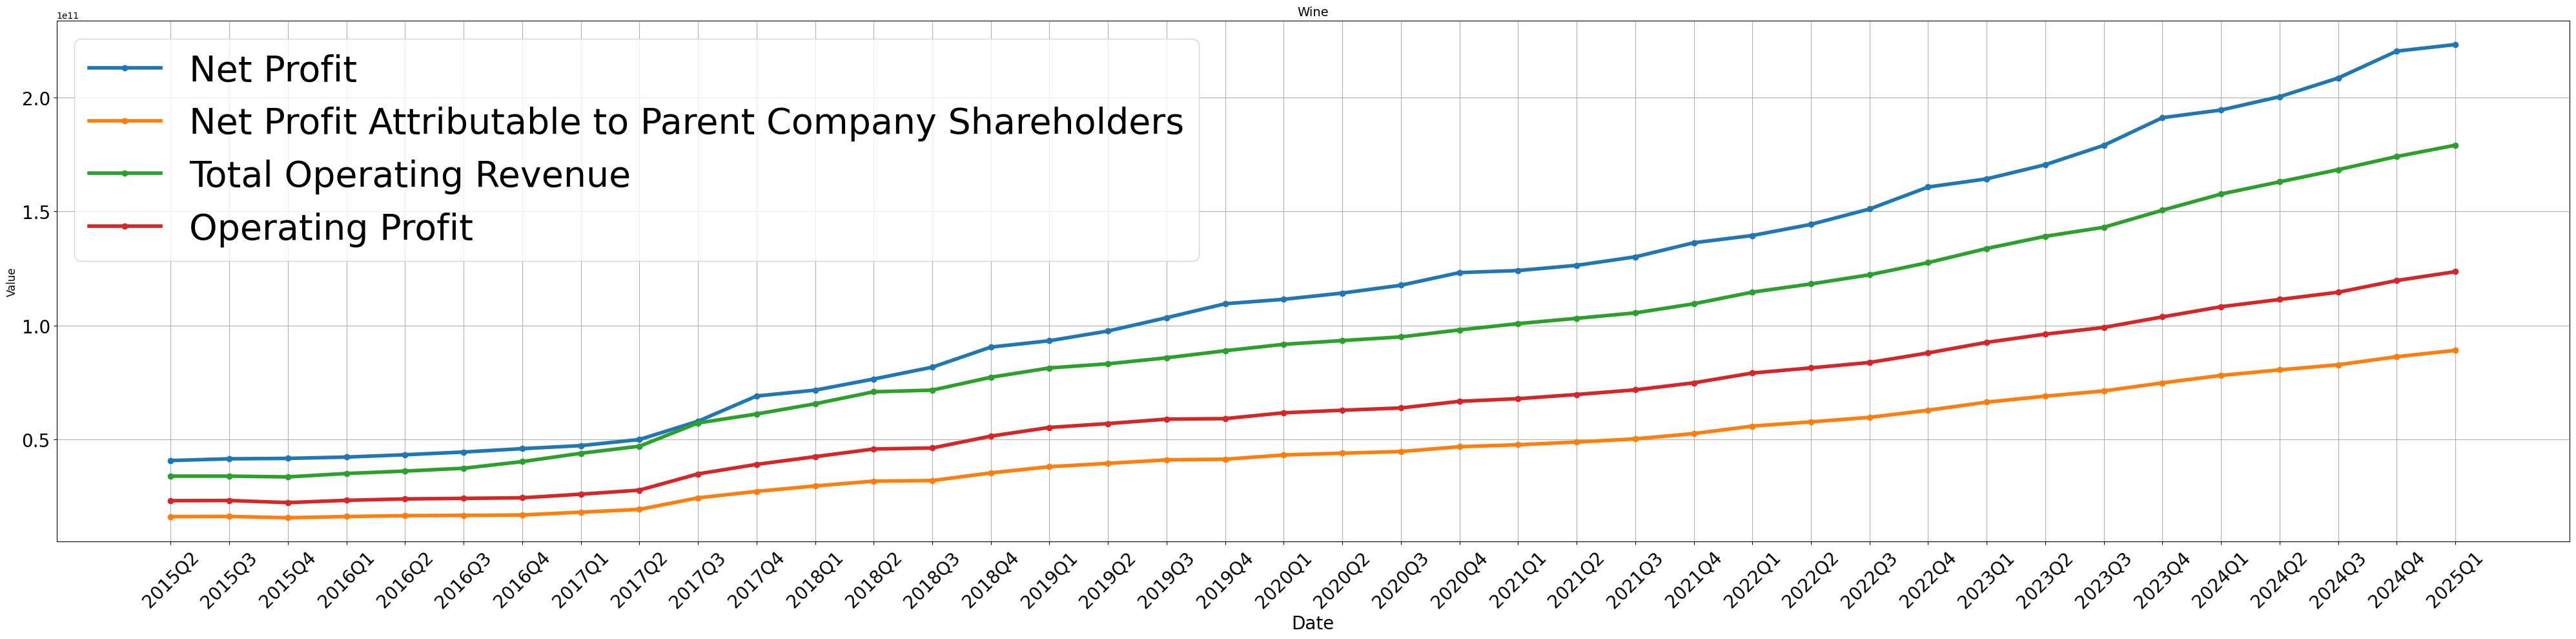

In [2]:

import matplotlib.pyplot as plt
from matplotlib import font_manager

symbols = get_symbols_by_sector(market="cn", sector="白酒.csv", dir_option="xq")
symbols = ['SH600519']
fd = FinanceData(market='cn')
df_quarterly, df_yearly = fd.equity_finance_process(symbols=symbols)

df_quarterly = df_quarterly.iloc[-40:]  # Select the last 40 rows for quarterly data
df_quarterly.plot(figsize=(40, 10), marker='o', linewidth=4)  # Add markers to the plot
plt.title("Wine", fontsize=14)  # Adjust title font size
plt.xlabel("Date", fontsize=20)  # Adjust x-axis label font size
plt.ylabel("Value", fontsize=12)  # Adjust y-axis label font size
plt.legend(loc='best', fontsize=40)  # Adjust legend font size
plt.grid(True)
plt.xticks(range(len(df_quarterly.index)), df_quarterly.index, rotation=45, fontsize=20)  # Adjust x-axis tick font size
plt.yticks(fontsize=20)  # Adjust y-axis tick font size
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

2025-07-05 20:56:08,459 - INFO - Processing NVDA


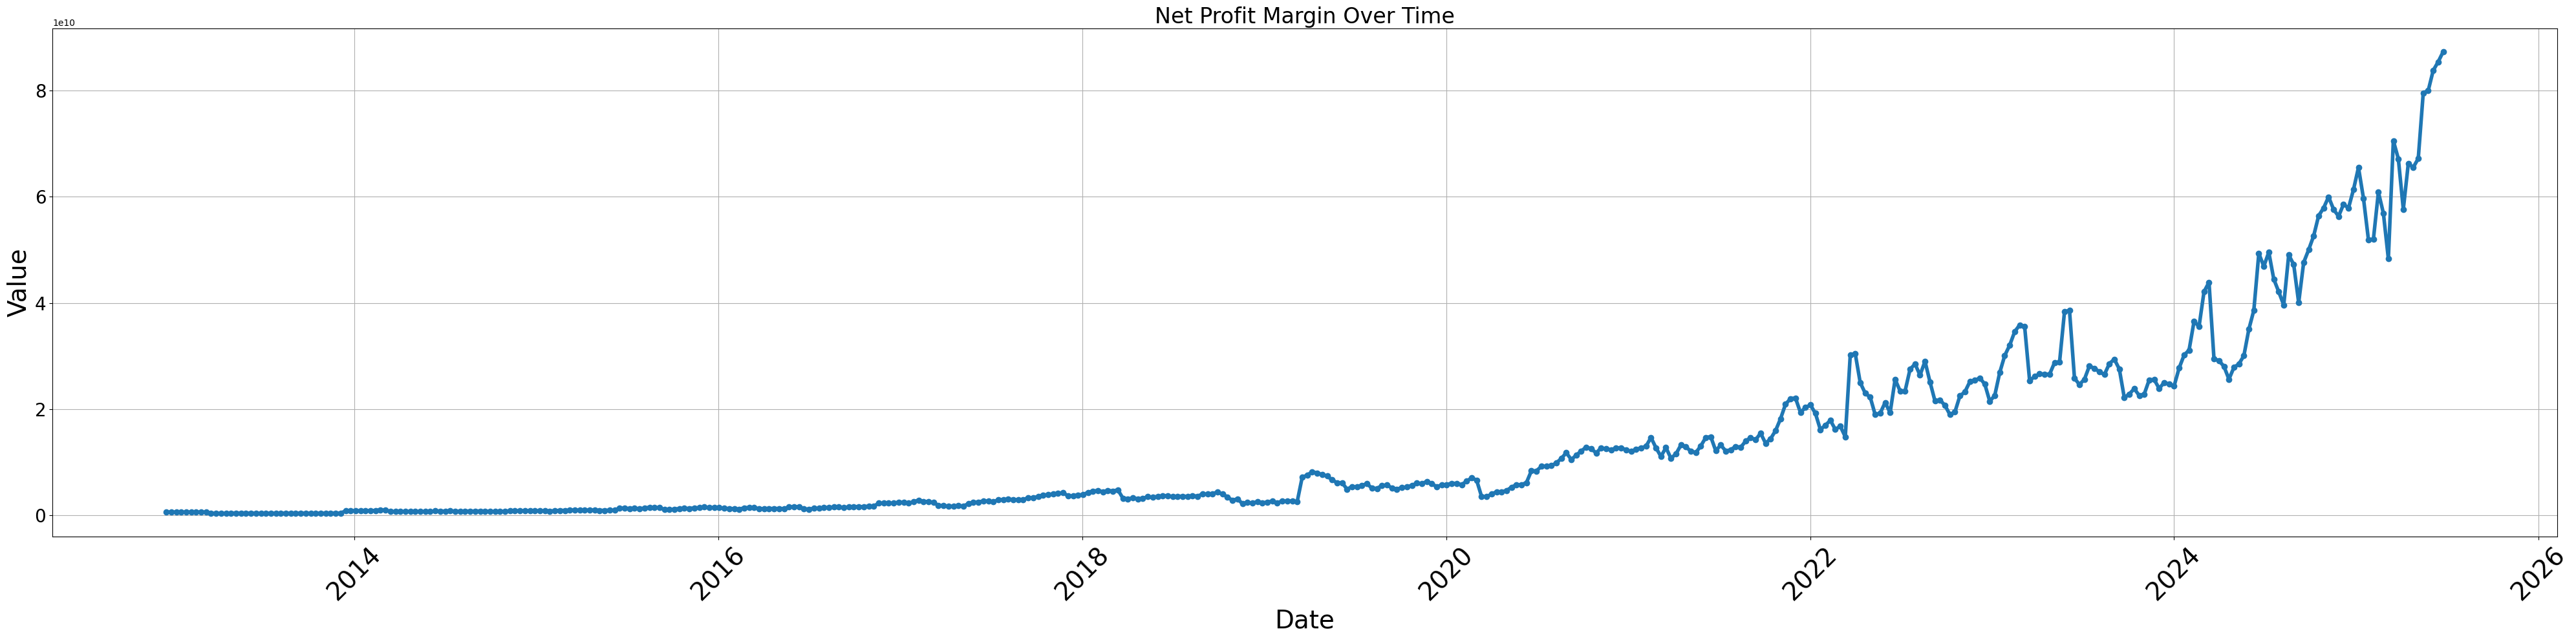

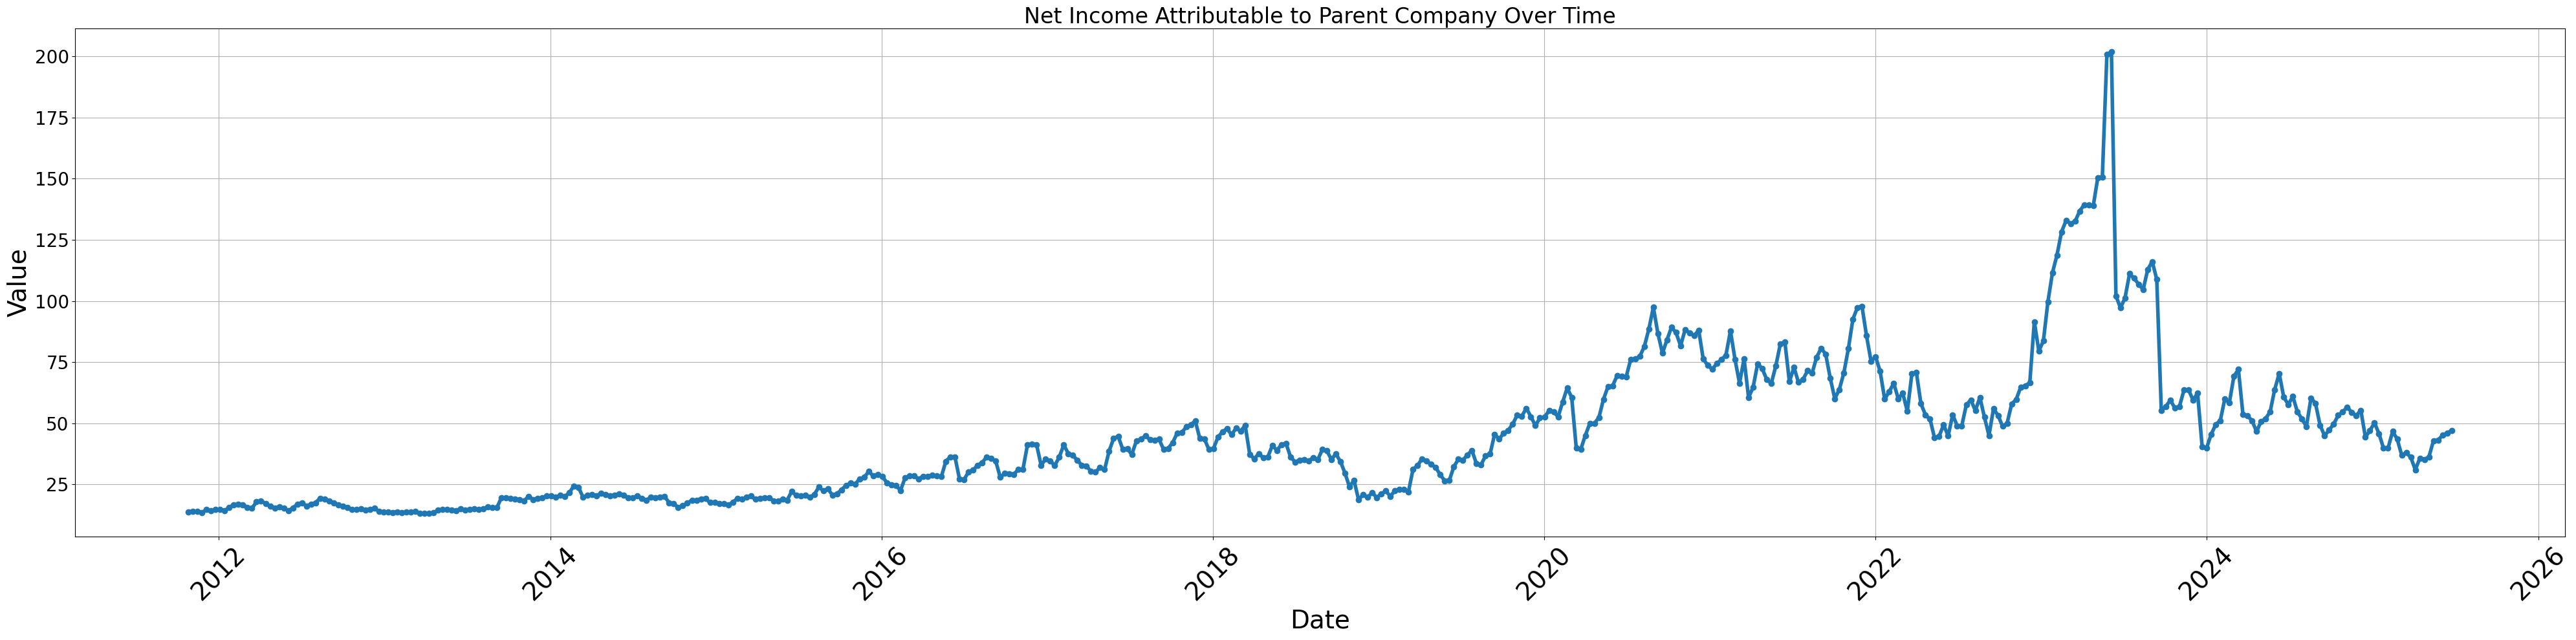

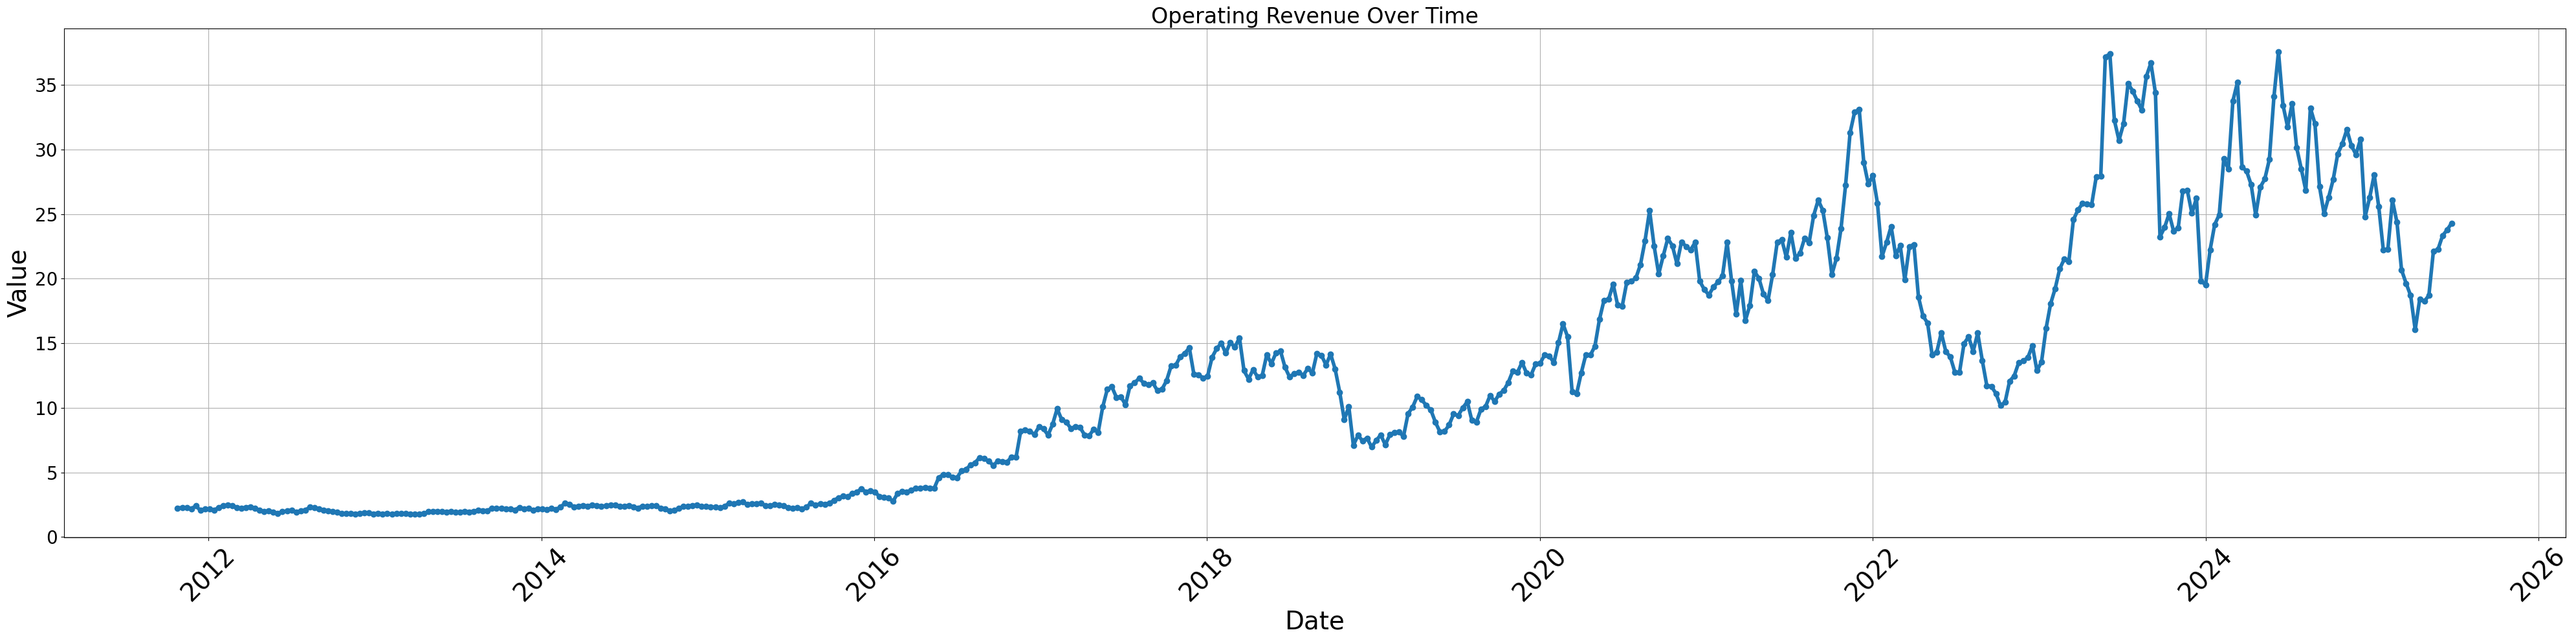

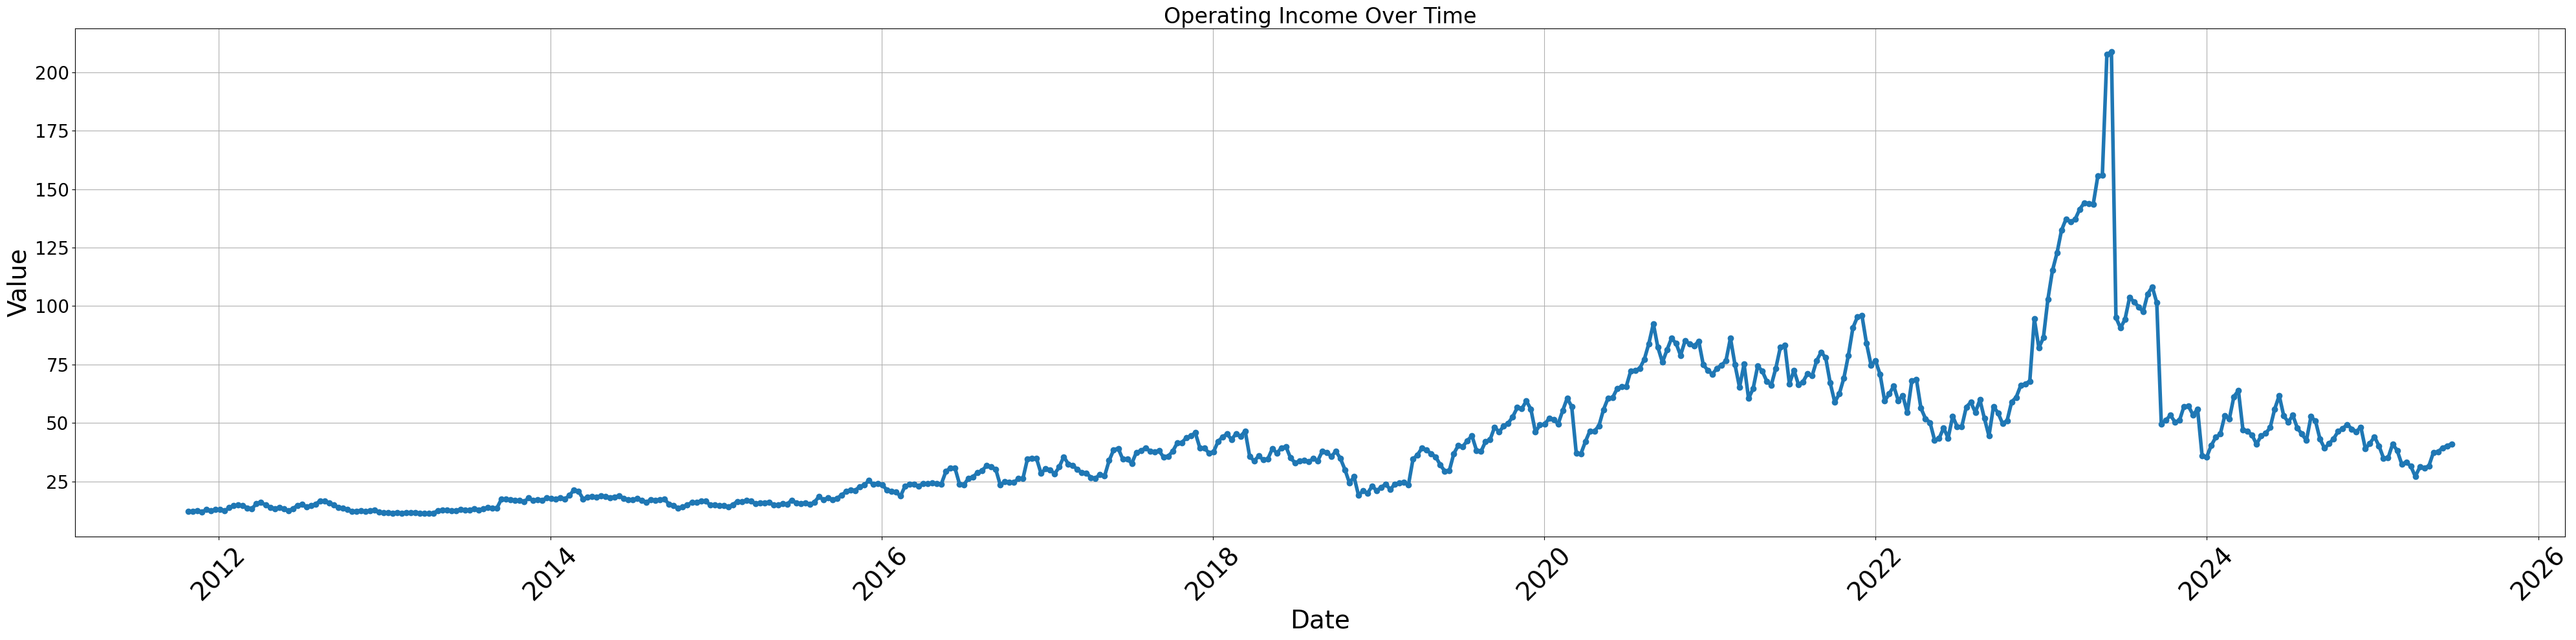

In [2]:

from duckdb import df
import matplotlib.pyplot as plt
from matplotlib import font_manager

iloc = -500
market='cn'
sector = "白酒"
sector = "IT服务.csv"
symbols =['SH600519']
symbols =['SZ000858']
# sector = "食品.csv"

market='us'
sector = "半导体产品与设备"
symbols =['NVDA']
# sector = "饮料.csv"
# sector = "互动媒体与服务"

# symbols = get_symbols_by_sector(market=market, sector=sector, dir_option="xq")

# print(symbols)


# symbols = ['SH600519']
fd = FinanceData(market)
df_quarterly, df_yearly = fd.equity_finance_process(symbols=symbols)

df_quarterly = df_quarterly.resample('10D').first()  # Takes first entry every 10 days

print(df_quarterly)

for col in FinancialColumns[market]:
    df_quarterly[col] = df_quarterly["market_capital"] / df_quarterly[col]  # Ensure all columns are float type

df_quarterly = df_quarterly.iloc[iloc:]  # Select the last 40 rows for quarterly data

# print(df_quarterly.tail(20))

for col in FinancialColumns[market]:
    plt.figure(figsize=(40, 10))  # Create a new figure for each column
    plt.plot(df_quarterly.index, df_quarterly[col], marker='o', linewidth=4)  # Plot the column
    plt.title(f"{col} Over Time", fontsize=24)  # Set the title to the column name
    plt.xlabel("Date", fontsize=28)  # Adjust x-axis label font size
    plt.ylabel("Value", fontsize=28)  # Adjust y-axis label font size
    plt.grid(True)
    plt.xticks(rotation=45, fontsize=28)  # Adjust x-axis tick font size
    plt.yticks(fontsize=20)  # Adjust y-axis tick font size
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()  # Display the figure